# Business Case : Prediction of quality of wine from given feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading dataset
data=pd.read_csv('wine.csv')

In [3]:
data

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Domian Analysis : Wine dataset

## Alcohol:
* Alcohol content in the wine Fortified(protected) wines range from 15.5% to 25% ABV, with an average of 18% and unfortified
## Malic acid:
* Malic Acid is one of the main acids found in the acidity of grapes. Its concentration decreases the more a grape ripens. Malic   Acid provides a strong link to wines tasting 'flat' if there is not enough.
## Ash:
* The analysis of ash content in foods is simply the burning away of organic content, leaving inorganic minerals.
## Alcalinity of Ash:
* In addition to determining ash content, Alkalinity of ash can also be determined as parameter. Ash content into wine lie         normally between 1,3 and 3,5 mg/l and is strongly influenced by water balance of vine
## Magnesium:
* Magnesium percentage in wine
## Total phenols:
* Condensed tannins, also called proanthocyanins, are the most abundant class of phenols in wine, accounting for about 25 to       50%. Red wines typically contain 0.3 to 2.0 grams per liter
## Flavonoids
* The flavonoids present in red wine include a wide range of compounds that affect colour, taste and mouth feel of the wine.       Flavonoids are the main polyphenols present in red wine by weight, and constitute about 80 to 90% of total polyphenols.         Flavonoids are derived primarily from the skin and or seed of red grapes.
## Nonflavonoid phenols
*
## proanthocyanins
* Proanthocyanidins are the principal polyphenols in red wine that are under research to assess risk of coronary heart disease     and lower overall mortality.
  wine was also found to increase life span by inducing longevity genes. It appears that resveratrol and proanthocyanidins,       especially resveratrol, present in grapes and wines play a crucial role in cardioprotective abilities of grapes and wines.
## color intensity:
* Wines with more red colored hue have a lower pH (high acidity). Wines with a violet colored hue range from around 3.4–3.6 pH     (on average). Wines with a more blueish tint (almost like magenta) are over 3.6 pH and possibly closer to 4 (low acidity)
## hue:
* Hue refers to the dominant color family. Hue refers to the origin of the colors we can see. Primary and Secondary colors         (Yellow, Orange, Red, Violet, Blue, and Green) are considered hues.
  The color of wine is one of the most easily recognizable characteristics of wines. Color is also an element in wine tasting     since heavy wines generally have a deeper color
## OD280/OD315 of diluted wines:
* This is a method for determining the protein concentration, which can determine the protein content of various wines. Factor     and cluster analysis are applied to the known data set to determine the category to which the wine sample belongs.
## proline
* The ranges found in California grape juices range from 304 to 4600 mg/l of proline and in the wines from O to 3400 mg/l of        proline

## Basic info
(1) Malic acid: It is a kind of acid with strong acidity and apple aroma. The red wine is naturally
                accompanied by malic acid.


(2) Ash: The essence of ash is an inorganic salt, which has an effect on the overall flavor of the wine and can give the wine a          fresh feeling.

(3) Alkalinity of ash: It is a measure of weak alkalinity dissolved in water.

(4) Magnesium: It is an essential element of the human body, which can promote energy metabolism and is weakly alkaline.

(5) Total phenols: molecules containing polyphenolic substances, which have a bitter taste and affect the taste, color
                   and taste of the wine, and belong to the nutrients in the wine.

(6) Flavanoids: It is a beneficial antioxidant for the heart and anti-aging, rich in aroma and bitter.

(7) Nonflavanoid phenols: It is a special aromatic gas with oxidation resistance and is weakly acidic.

(8) Proanthocyanins: It is a bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell.

(9) Color intensity: refers to the degree of color shade. It is used to measure the style of wine to be “light” or “thick”. The                       colorintensity is high, meanwhile the longer the wine and grape juice are in contact
                    during the wine making process, the thicker the taste.

(10) Hue: refers to the vividness of the color and the degree of warmth and coldness. It can be used to measure the variety and           age of the wine

## Basic checks

In [4]:
data.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.tail()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
data.describe()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
data.shape

(178, 14)

In [9]:
data.wine.unique()

array([1, 2, 3])

In [10]:
data.wine.value_counts()   # Imbalanced data

2    71
1    59
3    48
Name: wine, dtype: int64

## Exploratory Data Analysis (EDA)

### Univariant Analysis

In [11]:
box=data.iloc[:,1:]

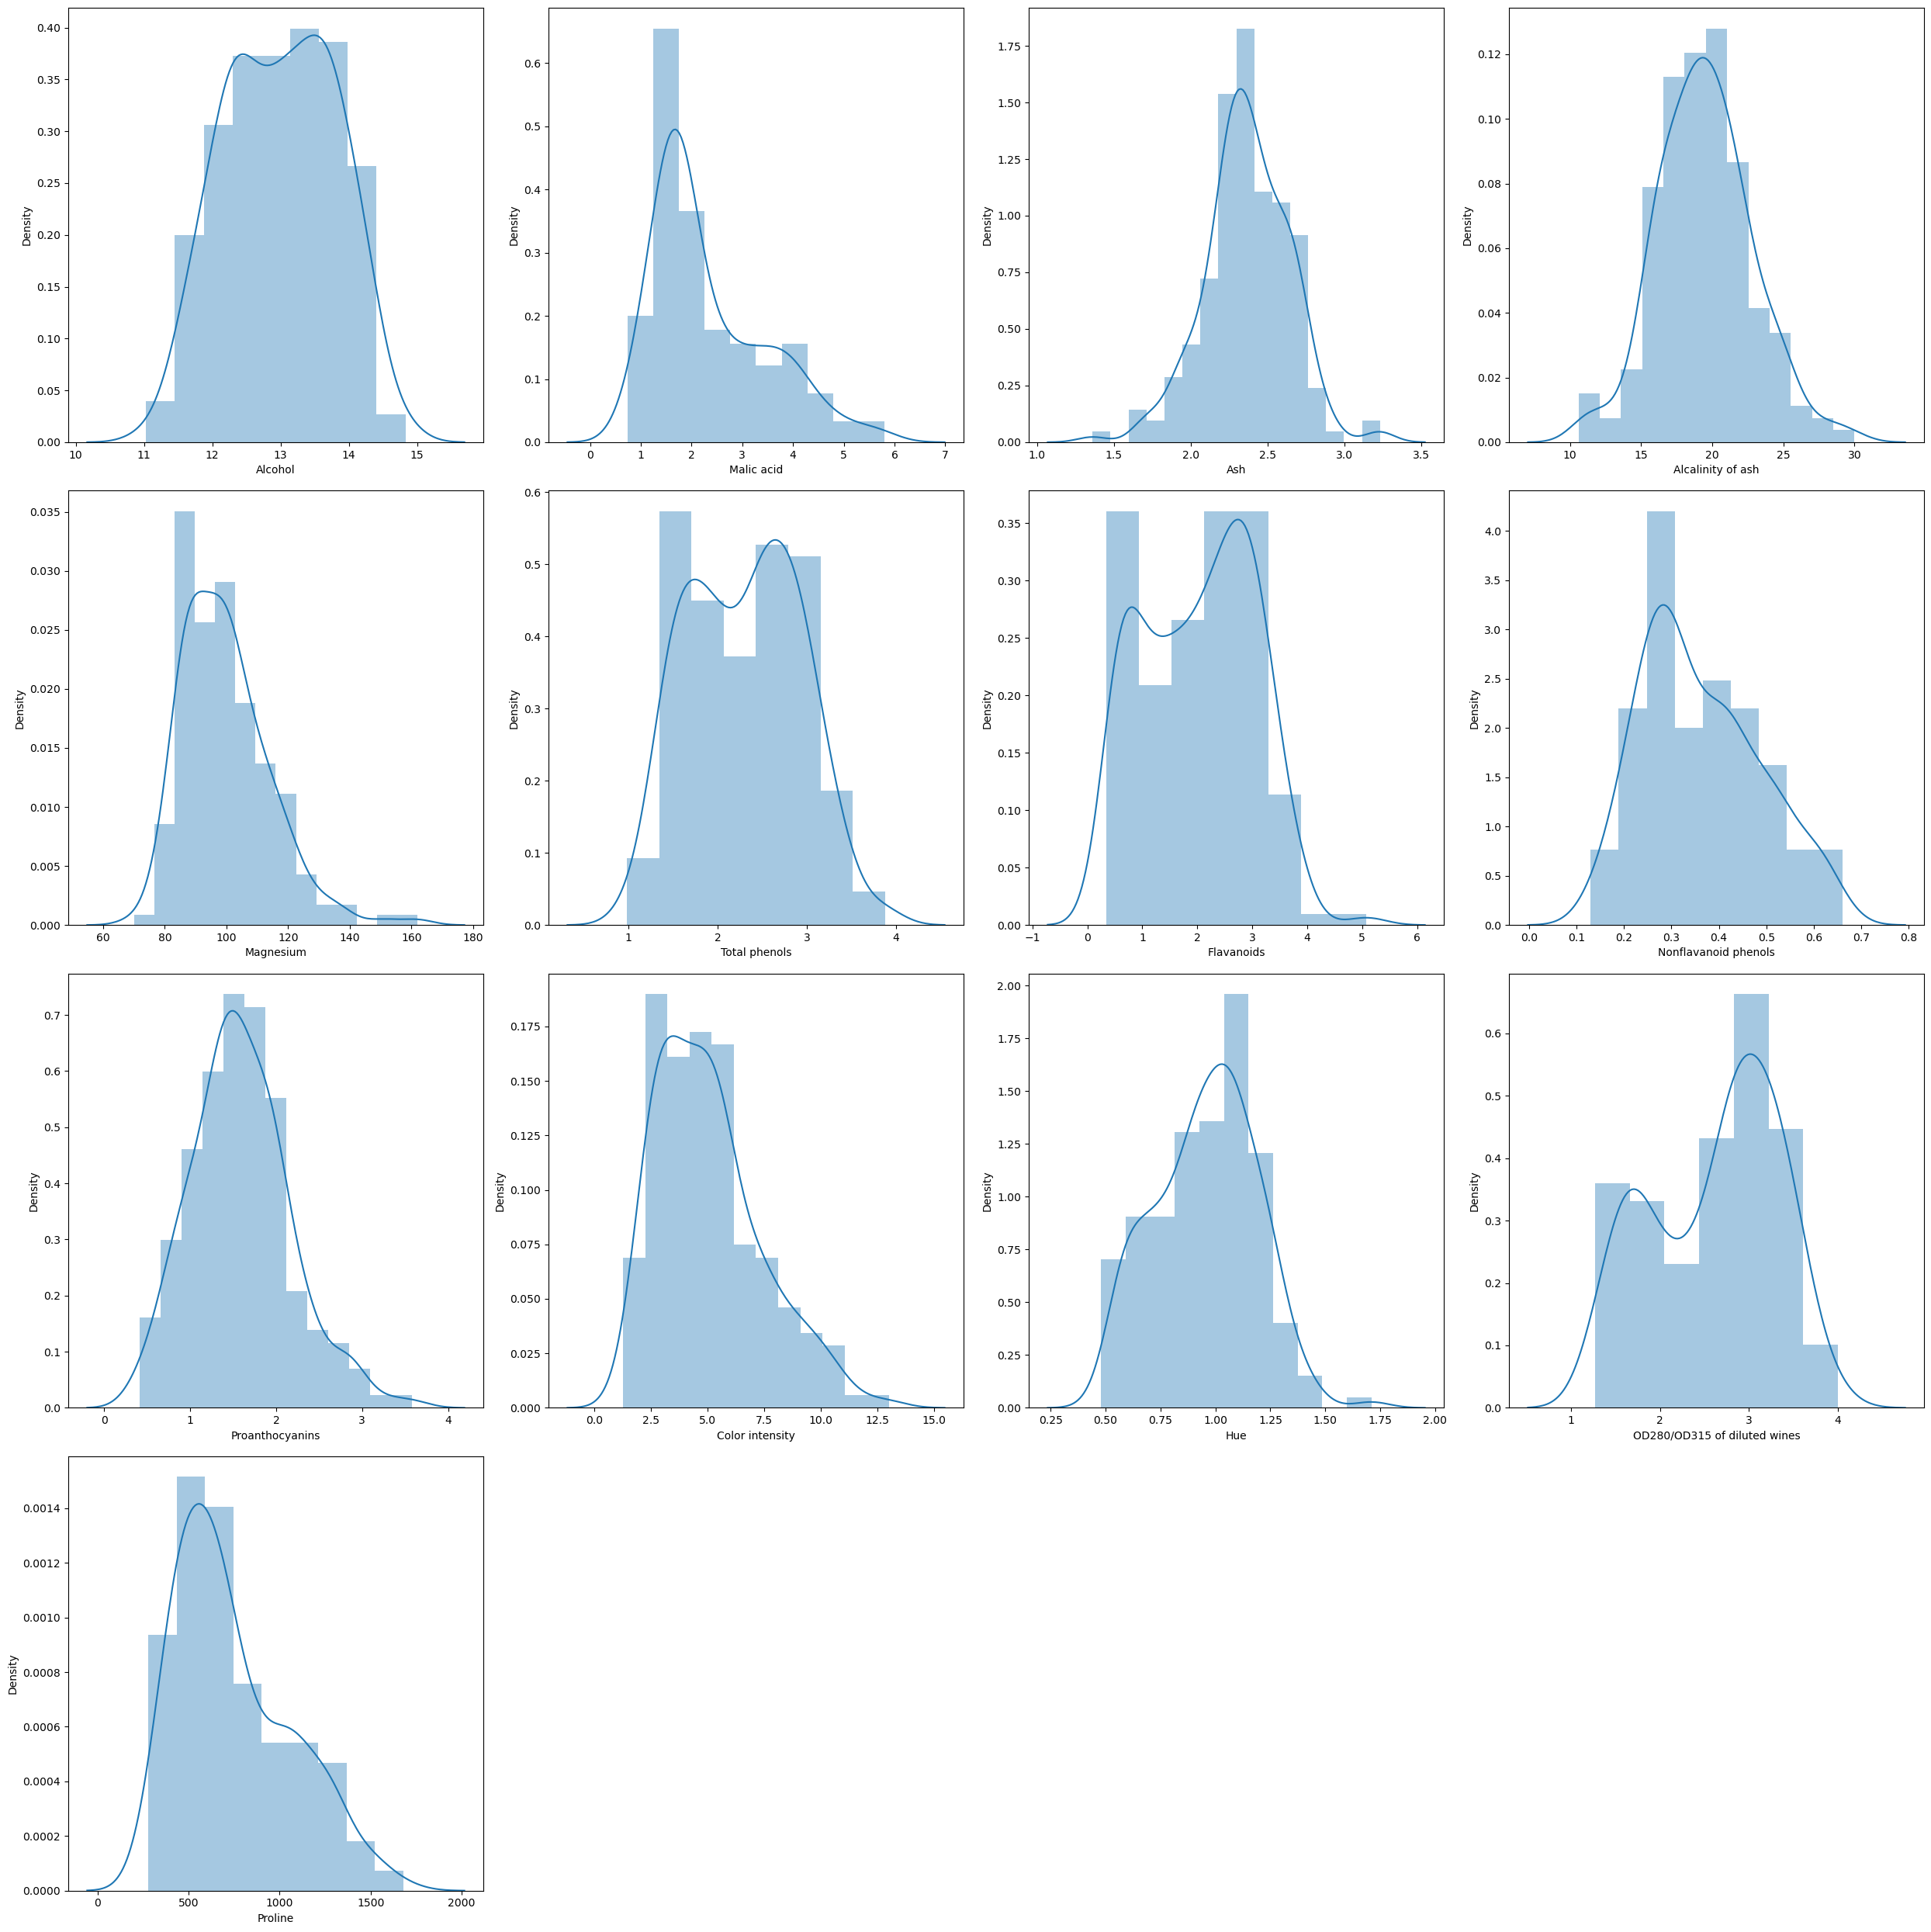

In [12]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.distplot(box[c])
    plotnum+=1
plt.tight_layout()

In [13]:
data.columns

Index(['wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [14]:
data.rename(columns = {'Alcohol':'alcohol',
                     'Malic acid':'malic_acid',
                     'Ash':'ash',
                     'Alcalinity of ash':'alcalinity_of_ash',
                     'Magnesium':'magnisum',
                     'Total phenols':'tot_phenols',
                     'Flavanoids':'flavanoids',
                     'Nonflavanoid phenols':'nonflavanoid_phenols',
                     'Proanthocyanins':'proanthocyanins',
                     'Color intensity':'color_intensity',
                     'Hue':'hue',
                     'OD280/OD315 of diluted wines':'diluted_wines',
                     'Proline':'proline'},inplace=True)

In [15]:
data.head()

,wine,alcohol,malic_acid,ash,alcalinity_of_ash,magnisum,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Alcohol
* Its not normally distrubuted
* Most of the wine have alcohol consentration/presence between 12 to 14 which is in normal range
* In describe the max value of alcohol is 14 but in dist plot its going beyound 14

### Malic acid
* Its not normally distrubuted curve
* its highly skew toward right side of the graph i.e high positive skewness
* Maximum wine have malic acid range from 1 to 2 (sweet in tast)
* rarly wine have malic acid range from 5 to 6 (sour in test)

### Ash
* Its skew toward the left side of the graph i.e negative skewness
* Its has a high peak i.e kutosis is higher than 3
* Maximum wine have ash range form 2 to 2.5

### Alclanity of ash
* Its is normally distrubuted curve
* maximum wine have range of AOA from  15 to 25

### Magnesium
* Its highly skew toward right side of the graph i.e positive skewness
* Maximum wine have magnesium range from 80 to 120

### Total phenol
* Its not normally distrubuted curve
* maxnimum wine have range from 1.5 to 3 (which affect the bitter tast of the wine)

### Flavanoids
* Its not a normally distrubuted curve
* Higher the value good is the tast
* maximum wine have 0.5 to 1 and 2.2 to 3

### Nonflavanoid phenols
* Its not  normally distrubuted

### Proanthocyanins
* Its normally distrubuted with little positive skewness
* Maximum wine have range from 1 to 2

### color intensity
* Its is normarlly distrubuted
* Maximum wine have medium color intensity or less rich color (2 to 5)
* Above that the wine are rich in color


### Hue
* Its not normally  distrubuted
* its represent dominant color

### OD280/OD315 of diluted wines
* Its not normally distrubuted

### proline
* Its not normally distrubuted
* Highly positively  skew

## Bivariant analysis

### Analysis of continous variable with target variable

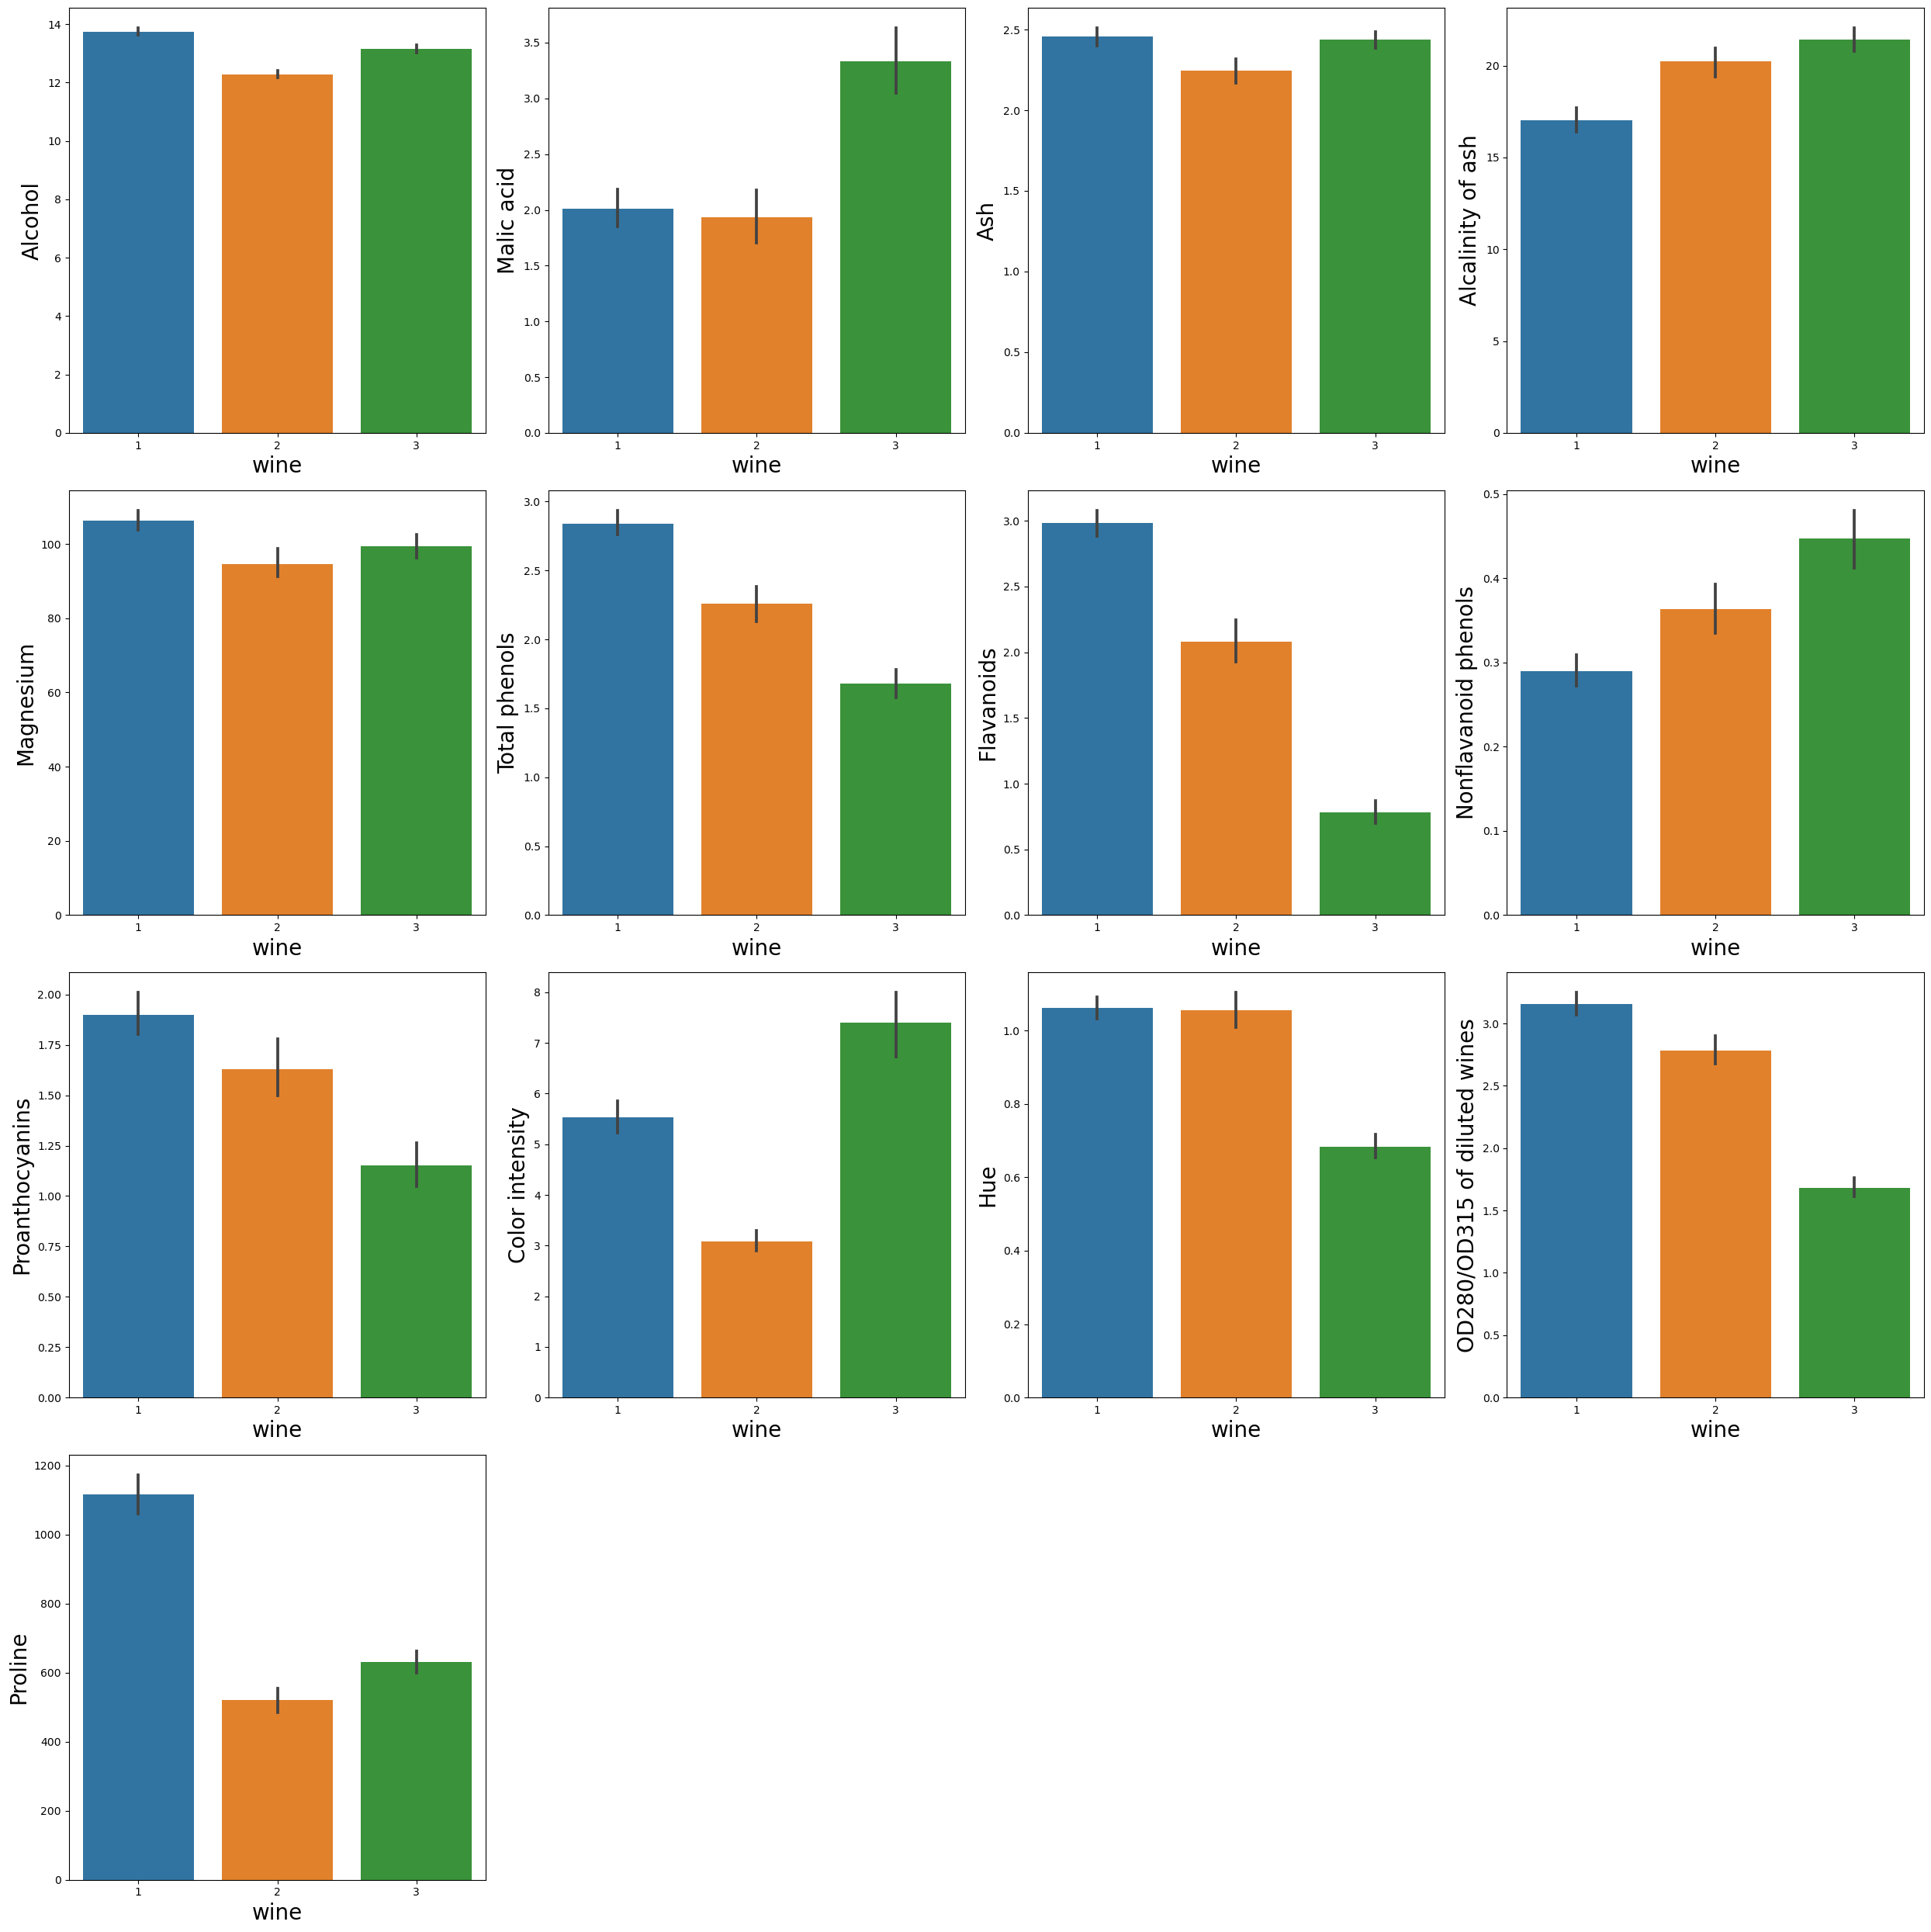

In [16]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.barplot(x=data.wine,y=box[c])
        plt.xlabel('wine',fontsize=20)
        plt.ylabel(c,fontsize=20)

    plotnum+=1
plt.tight_layout()

### Alcohol vs wine
* Alcohol do not have any specific relationship with wine
* Because all wine have range of alcohol from 12 to 14 which is normal range

### Malic acid vs wine
* High quality wine has more amount of malic acid in it
* which increase the bitter tast in it
* So which wine have high value of malic acid can be called high ratted

### Ash vs wine
* Its  do not show any relationship between them
* All wine have ash value 2.0 to 2.5 which is nearly equal

### Alclanity of ash vs wine
* The more the wine balance with the water
* The more its ratting
* Directly proposnal relationship3

### Magnesium vs wine
* Its do not show any relation but its show fixed mean value for high ratted wine
* other wise all wine range are nearly same

### Total phenols vs wine
* Inversly proposnl relationship betwee them
* lower the total phenols higher the wine ratting

### Flavanoids vs wine
* Lower the flavonoids higher the ratting accordind to dataset
* more bitter tast

### Nonflavanoid phenols vs wine
* Directly proposnal relationship is there

### Proanthocyanins vs wine
* Inverserly proposnal relationship is there

### color intensity vs wine
* It do not show any specific relatitonship
* But the higher the color intensity the rich is color of the wine
* So wine with the much higher color intensity score have high ratting

### hue vs wine
* Its do not show any specific relation
* But hue represent dominance of the color like core color ( red, blue , green)
* so we can say that wine with the rare color are high ratted

### OD280/OD315 of diluted wines vs wine
* Inverserly proposnal  relationship between them

### Proline vs wine
* It do not show any specific relationship
* we can say that it has some specific value for each ratting

# Data preprocessing

In [17]:
data.wine.value_counts()

2    71
1    59
3    48
Name: wine, dtype: int64

### checking for null values

In [18]:
data.isnull().sum()
## no null values present

wine                    0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnisum                0
tot_phenols             0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
diluted_wines           0
proline                 0
dtype: int64

In [19]:
data.duplicated().sum()

0

### conversion of categorical columns in to numrical columns
* we do not have any categorical data in the data set
* So this step  can be excluded

### checking for outliers

In [20]:
data_box=data[[ 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnisum',
       'tot_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'diluted_wines', 'proline']]

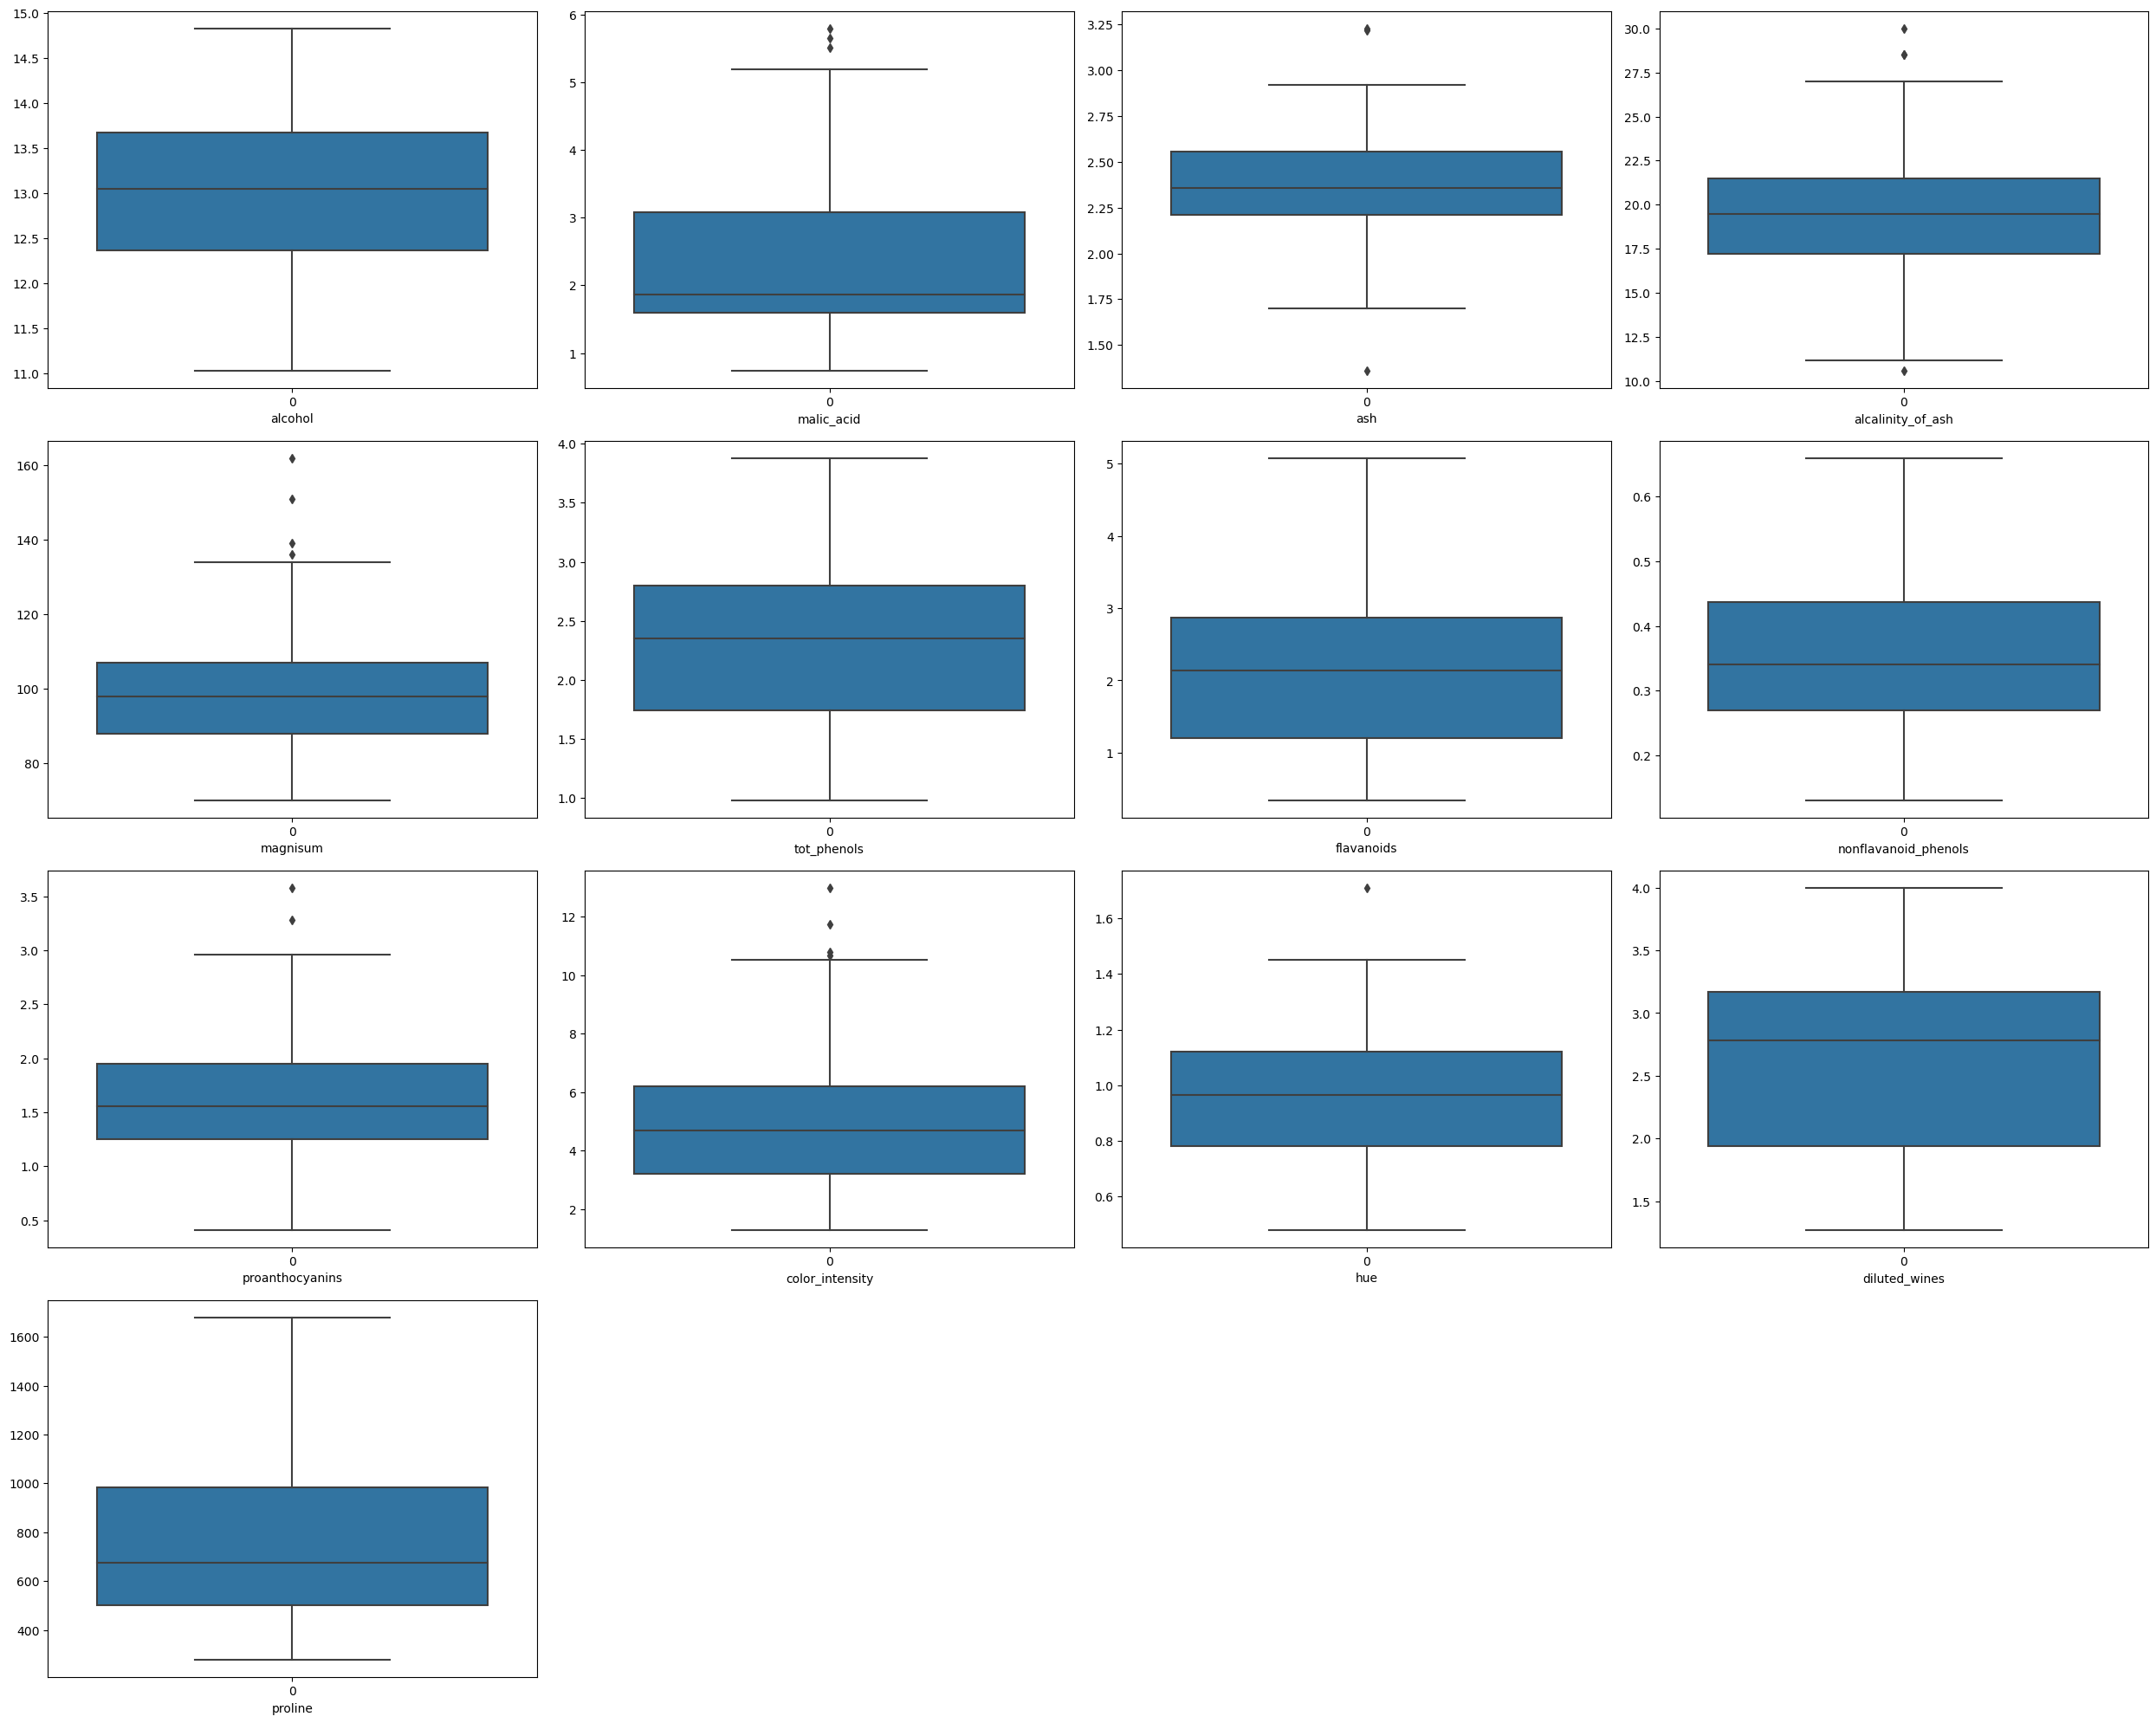

In [21]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data_box:
    if plotnumber<=16 :
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [22]:
data_dist=data[['malic_acid', 'ash', 'alcalinity_of_ash', 'magnisum','proanthocyanins',
       'color_intensity', 'hue']]

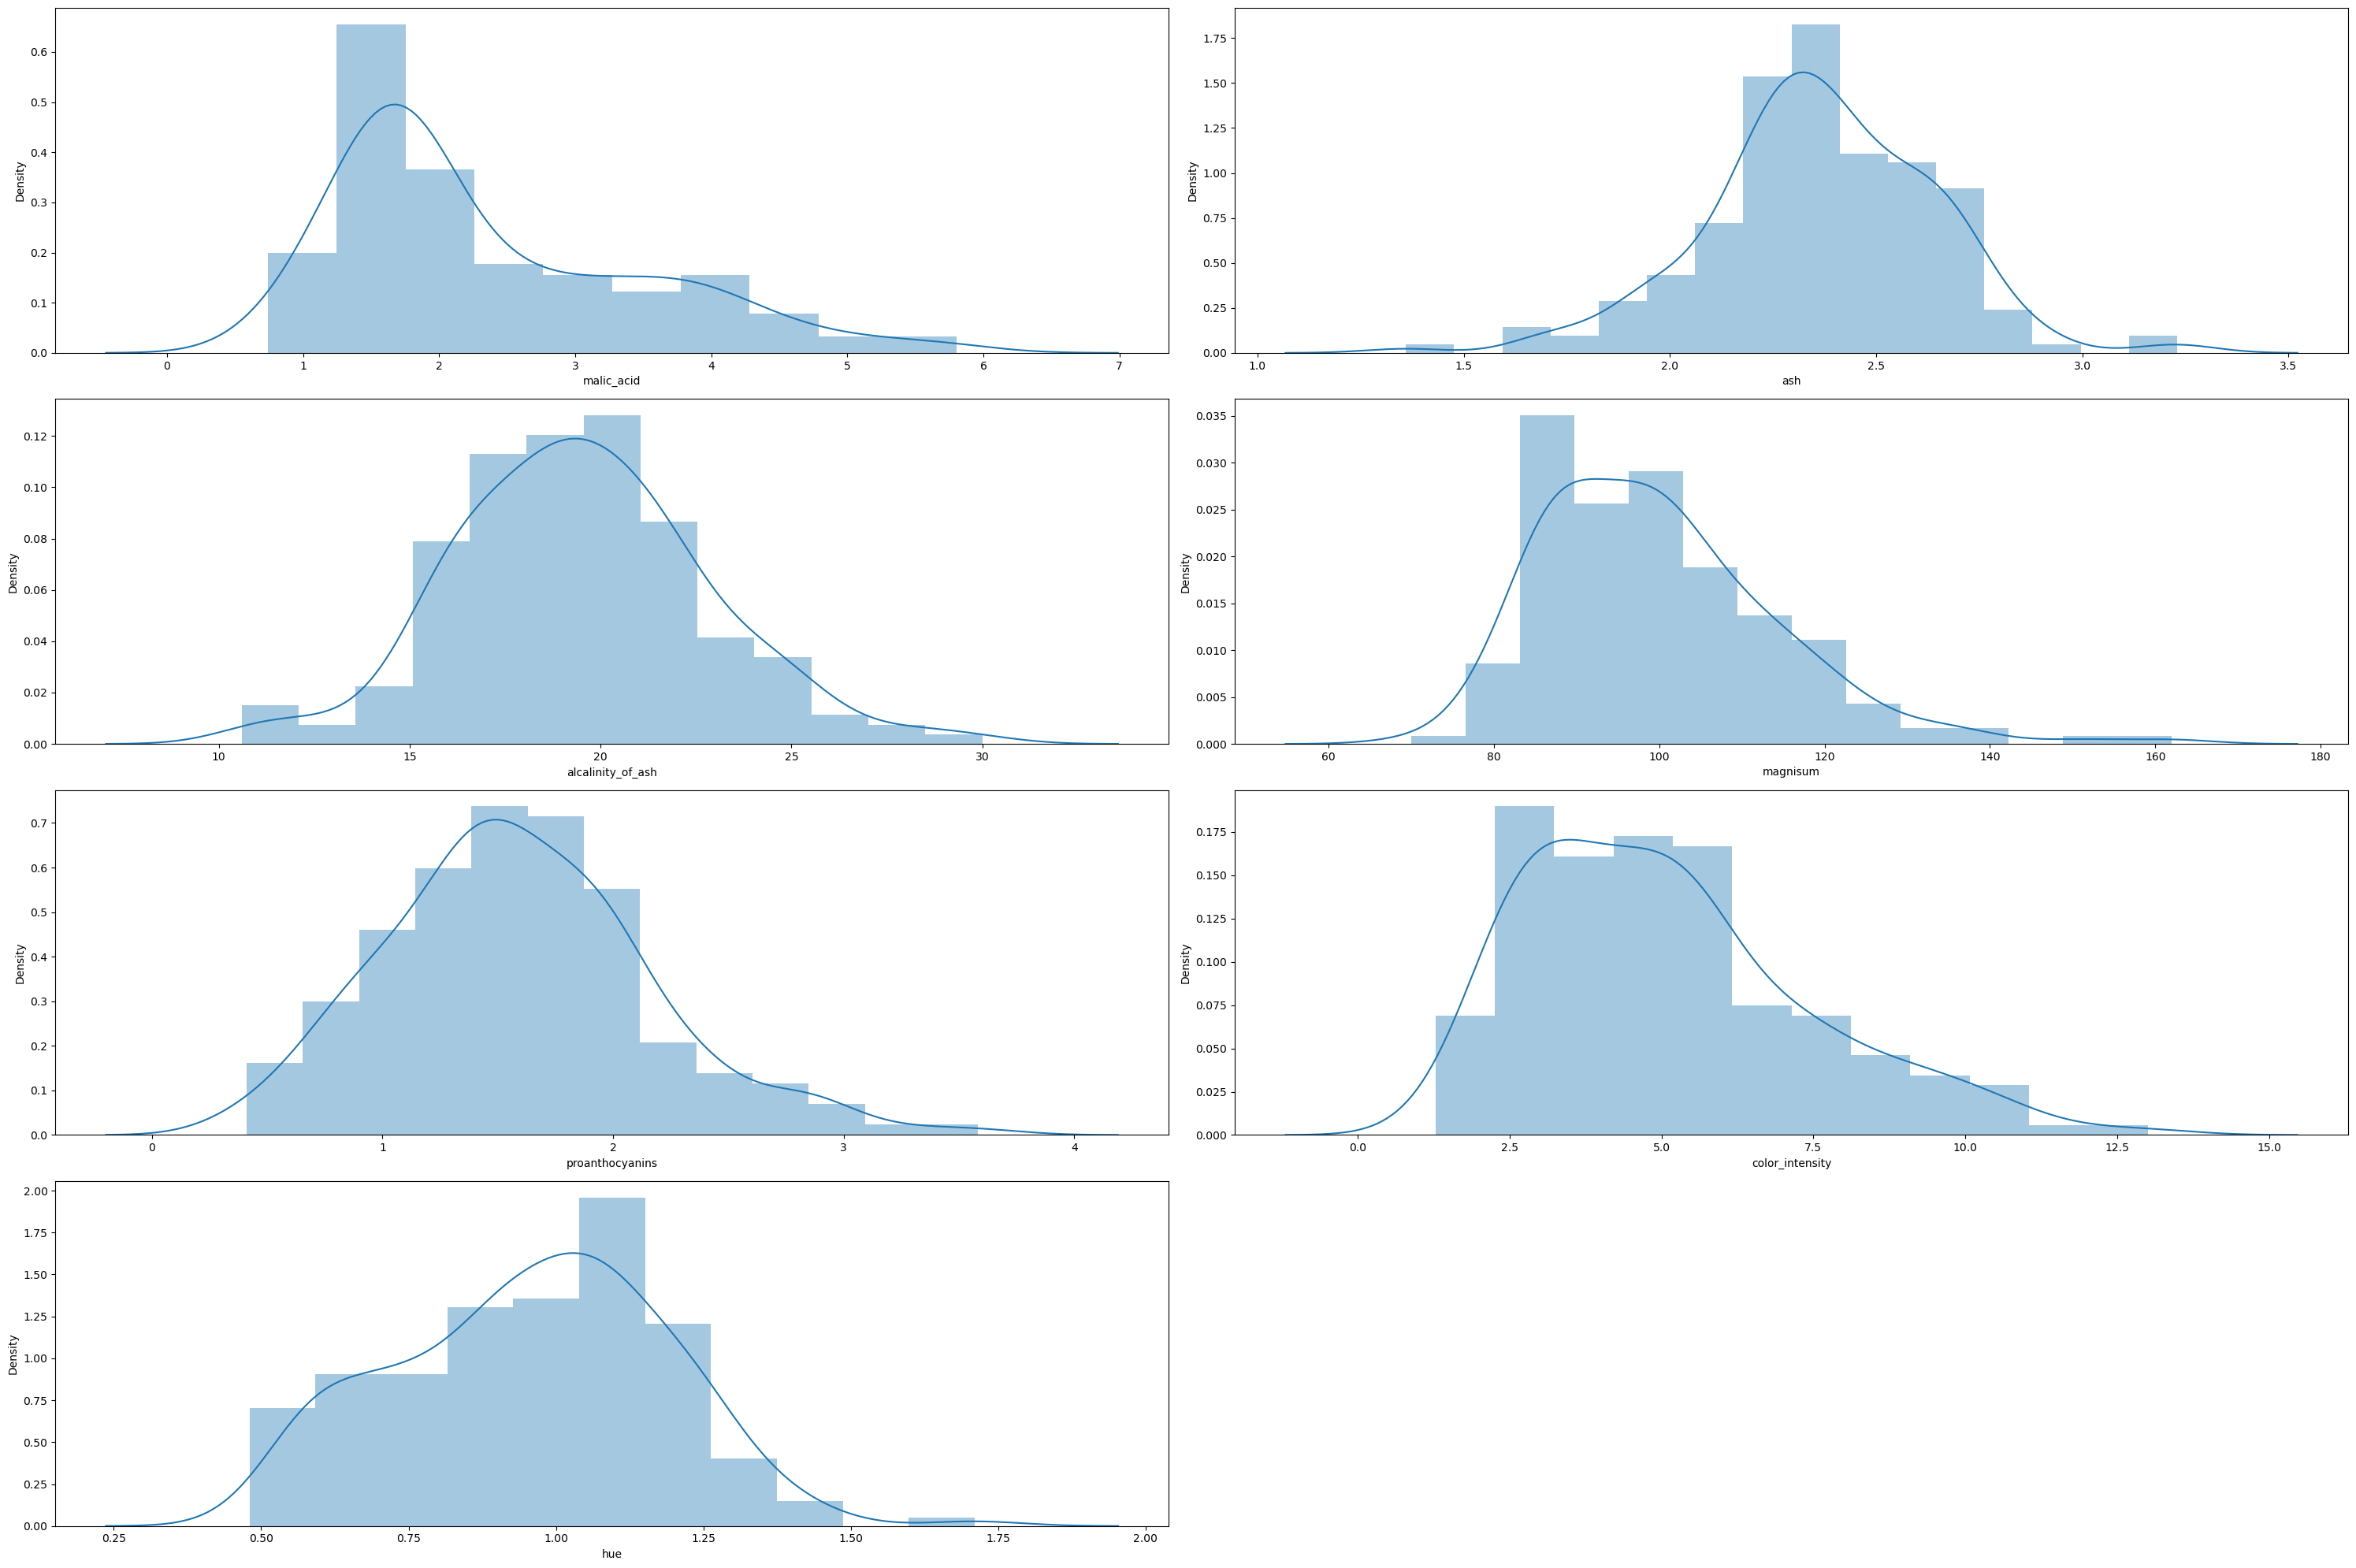

In [23]:
plt.figure(figsize=(30,20),facecolor='white')

plotnumber=1

for column in data_dist:
    if plotnumber<=8 :
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])

    plotnumber+=1
plt.tight_layout()

In [24]:
data.sample(10)

,wine,alcohol,malic_acid,ash,alcalinity_of_ash,magnisum,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
43,1,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.360000,0.82,3.00,680
152,3,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.100000,0.61,1.33,425
52,1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.050000,1.01,3.26,1190
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
104,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.940000,1.04,3.57,672
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.700000,0.86,3.02,312
17,1,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.600000,1.13,2.57,1130
94,2,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.250000,1.16,2.96,345
101,2,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.450000,1.04,2.77,562
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.600000,1.05,2.65,450


In [ ]:
# Scaling -> magnisum -> MinMaxScaler

# Feature Selection


In [ ]:
# We don't have any irrelevant column to drop.

<Axes: >

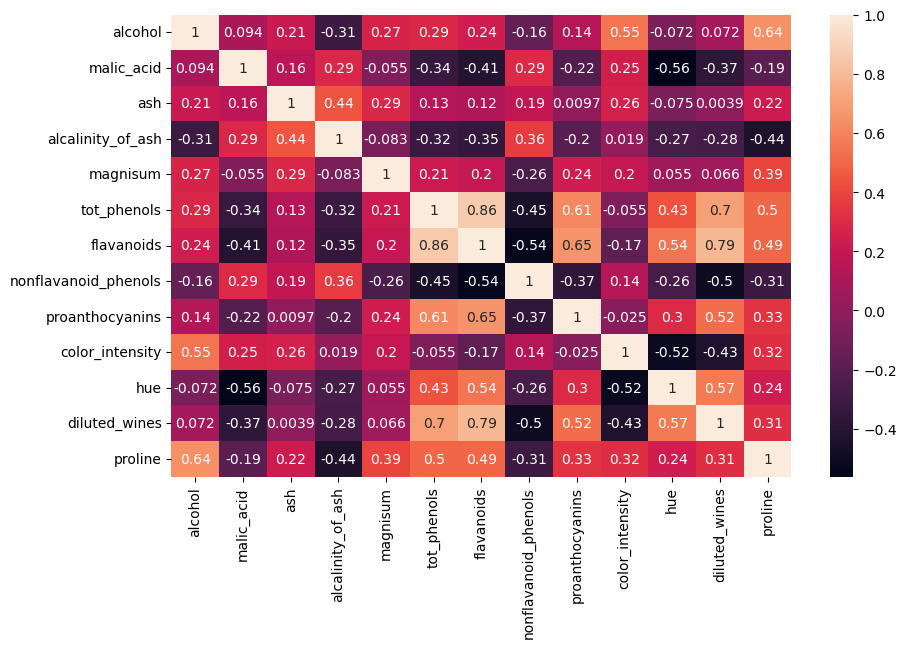

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop('wine',axis=1).corr(), annot= True)

# Model Building

In [30]:
X = data.drop('wine', axis=1)
y = data['wine']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
# Handling data imbalancing

from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_smote, y_smote = sm.fit_resample(X_train,y_train)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [34]:
logreg.fit(x_smote, y_smote)

LogisticRegression()

In [35]:
y_pred = logreg.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)

In [37]:
accuracy

0.9722222222222222

# Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bc = BaggingClassifier(base_estimator=logreg, n_estimators=300)

In [44]:
bc.fit(x_smote, y_smote)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=300)

In [45]:
y_pred_bc = bc.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred_bc)

0.9722222222222222

In [59]:
# using KNN as base algorithm

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_smote, y_smote)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred_knn = knn.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred_knn)

0.8055555555555556

[0.2222222222222222,
 0.25,
 0.19444444444444445,
 0.2222222222222222,
 0.25,
 0.25,
 0.25,
 0.2222222222222222,
 0.25,
 0.25,
 0.25,
 0.25,
 0.2222222222222222,
 0.25]